## Example usage with PyDESeq2

The codes are derived from [Step-by-step PyDESeq2 workflow](https://pydeseq2.readthedocs.io/en/latest/auto_examples/plot_step_by_step.html).
The dataset used was from the paper investigating BK polyomavirus infection in urothelial cells ([Baker et al. Oncogene. 2022](https://www.nature.com/articles/s41388-022-02235-8)).

In [1]:
import os
import pickle as pkl

from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data

In [2]:
import pandas as pd
count_df = pd.read_csv("../PRJNA728925_count.txt", sep="\t").T
count_df.head()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
SRR14509882,49,57,0,0,0,718,1,0,3682,0,...,574,793,223,1320,882,1,1791,2787,2276,1576
SRR14509883,106,82,0,12,6,83,0,0,1715,1,...,731,1266,44,471,389,5,632,2127,871,676
SRR14509884,67,36,2,25,5,499,0,0,2188,0,...,1172,2256,122,741,732,14,915,3463,1419,1009
SRR14509885,85,67,0,2,3,393,0,0,2155,2,...,1348,3155,187,1566,738,26,1198,3738,2044,1051
SRR14509886,29,42,0,2,2,76,0,0,2834,0,...,298,137,205,743,852,0,1548,2878,1952,1297


In [3]:
clinical_df = pd.read_csv("../SraRunTable_PRJNA728925.txt", sep=",")
clinical_df.index = clinical_df.Run
clinical_df.index.name = None
clinical_df.head()

,Run,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,Center Name,Consent,DATASTORE filetype,...,LibrarySelection,LibrarySource,Organism,Platform,ReleaseDate,Sample Name,source_name,SRA Study,Tissue,viral_infection
SRR14509882,SRR14509882,RNA-Seq,300,11066499600,PRJNA728925,SAMN19107552,3333844788,GEO,public,"sra,fastq",...,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2022-02-23T00:00:00Z,GSM5289794,Normal human urothelial cells,SRP319465,Ureter,BKPyV (Dunlop) MOI=1
SRR14509883,SRR14509883,RNA-Seq,302,8436386308,PRJNA728925,SAMN19107551,2801216097,GEO,public,"fastq,sra",...,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2022-02-23T00:00:00Z,GSM5289795,Normal human urothelial cells,SRP319465,Ureter,BKPyV (Dunlop) MOI=1
SRR14509884,SRR14509884,RNA-Seq,300,9742943700,PRJNA728925,SAMN19107550,3188119940,GEO,public,"fastq,sra",...,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2022-02-23T00:00:00Z,GSM5289796,Normal human urothelial cells,SRP319465,Ureter,BKPyV (Dunlop) MOI=1
SRR14509885,SRR14509885,RNA-Seq,300,11410353600,PRJNA728925,SAMN19107549,3722953816,GEO,public,"sra,fastq",...,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2022-02-23T00:00:00Z,GSM5289797,Normal human urothelial cells,SRP319465,Ureter,BKPyV (Dunlop) MOI=1
SRR14509886,SRR14509886,RNA-Seq,300,9985769400,PRJNA728925,SAMN19107548,3153799143,GEO,public,"sra,fastq",...,cDNA,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2022-02-23T00:00:00Z,GSM5289798,Normal human urothelial cells,SRP319465,Ureter,No infection


In [4]:
dds = DeseqDataSet(
    counts=count_df,
    clinical=clinical_df,
    design_factors="viral_infection",  # compare samples based on the "condition"
    refit_cooks=True,
    n_cpus=8,
)

In [5]:
dds.fit_size_factors()
dds.fit_genewise_dispersions()
dds.fit_dispersion_trend()
dds.fit_dispersion_prior()
dds.fit_MAP_dispersions()
dds.fit_LFC()

Fitting size factors...
... done in 0.05 seconds.

Fitting dispersions...
... done in 3.05 seconds.

Fitting dispersion trend curve...
... done in 6.95 seconds.

Fitting MAP dispersions...
... done in 3.70 seconds.

Fitting LFCs...
... done in 1.91 seconds.



In [6]:
dds.calculate_cooks()
if dds.refit_cooks:
    # Replace outlier counts
    dds.refit()

Refitting 357 outliers.

Fitting dispersions...
... done in 0.08 seconds.

Fitting MAP dispersions...
... done in 0.08 seconds.

Fitting LFCs...
... done in 0.08 seconds.



In [7]:
stat_res = DeseqStats(dds, alpha=0.05,contrast=["viral_infection","BKPyV (Dunlop) MOI=1","No infection"])
stat_res.run_wald_test()
if stat_res.cooks_filter:
    stat_res._cooks_filtering()
stat_res.p_values
if stat_res.independent_filter:
    stat_res._independent_filtering()
else:
    stat_res._p_value_adjustment()
stat_res.summary()

Running Wald tests...
... done in 3.29 seconds.

Log2 fold change & Wald test p-value: viral_infection BKPyV (Dunlop) MOI=1 vs No infection


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
A1BG,65.042617,-0.174495,0.274393,-0.635932,0.524821,0.998845
A1BG-AS1,60.814662,-0.097512,0.260997,-0.373613,0.708692,0.998845
A1CF,0.234785,-0.438579,2.539843,-0.172680,0.862903,NaN
A2M,3.841866,0.917285,0.822768,1.114876,0.264904,0.965674
A2M-AS1,3.520622,0.412318,0.492133,0.837817,0.402133,0.994437
...,...,...,...,...,...,...
ZYG11A,4.020418,0.989967,0.716537,1.381599,0.167095,0.906121
ZYG11B,1387.374886,-0.189671,0.126651,-1.497585,0.134241,0.873862
ZYX,2956.789644,-0.056822,0.104073,-0.545980,0.585079,0.998845
ZZEF1,1916.557304,-0.129015,0.110549,-1.167041,0.243194,0.963318


In [8]:
stat_res_summary = stat_res.results_df

In [9]:
sig_genes = stat_res_summary[stat_res_summary.padj<0.05].index

In [10]:
lfc_key = stat_res_summary.log2FoldChange.to_dict()

### Visualize the DEG information
Visualize the log2 fold changes of the genes in the certain pathway, and highlight DEGs.

In [12]:
import pykegg
import requests_cache
import numpy as np
from PIL import Image

## Cache all the downloaded
requests_cache.install_cache('pykegg_cache')

In [13]:
graph = pykegg.KGML_graph(pid="hsa04110")

In [14]:
nds = graph.get_nodes()

In [15]:
highlight_value = []
## If one of the symbols in identifiers in the nodes is in DEGs
for node in nds.graphics_name:
    in_node = [i.replace("...","") for i in node.split(",")]
    intersect = set(in_node) & set(sig_genes)
    if len(intersect) > 0:
        highlight_value.append(True)
    else:
        highlight_value.append(False)

In [19]:
nds = pykegg.append_colors_continuous_values(nds, lfc_key)

In [20]:
nds["highlight"] = highlight_value

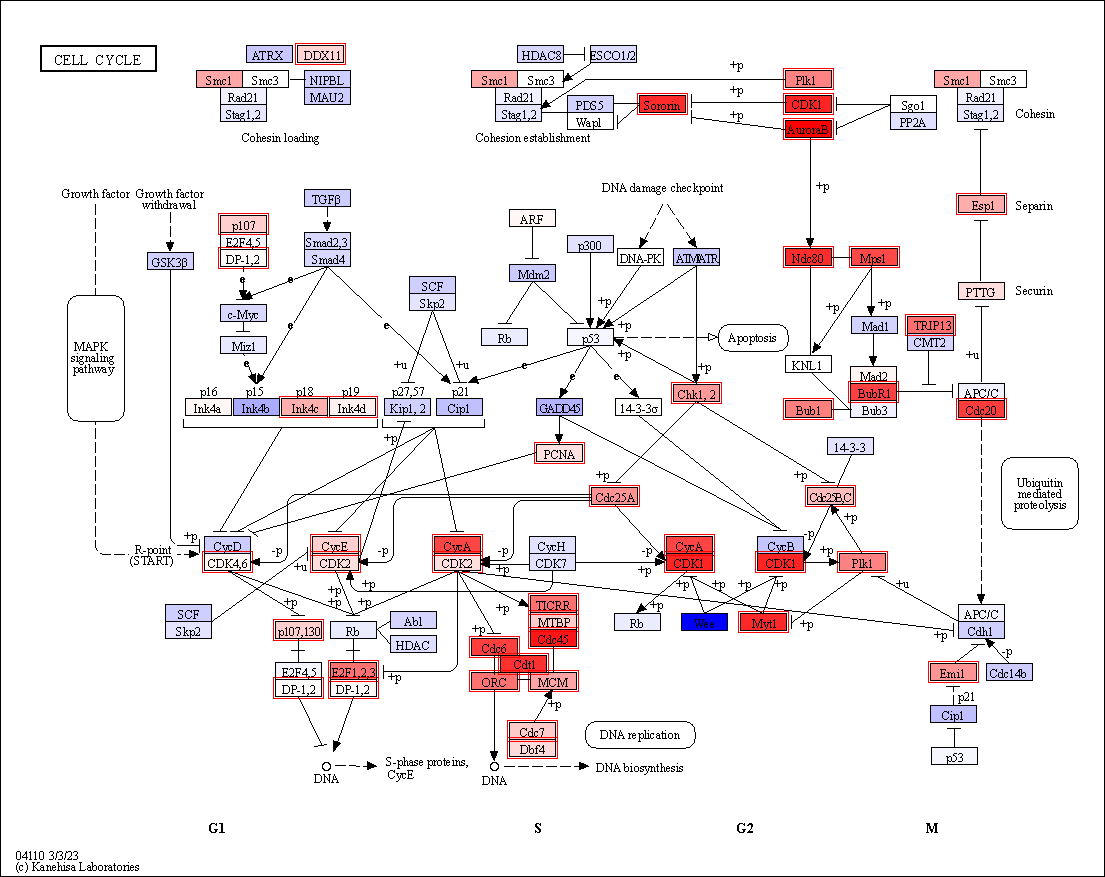

In [21]:
Image.fromarray(pykegg.overlay_opencv_image(nds,
                                            pid="hsa04110",
                                            highlight_nodes="highlight"))

### deseq2_raw_map() function
deseq2_raw_map serves as a wrapper function, consolidating the aforementioned example into a single function, with appending the colormap. It necessitates extracting PyDESeq2's results_df as a DataFrame for input.

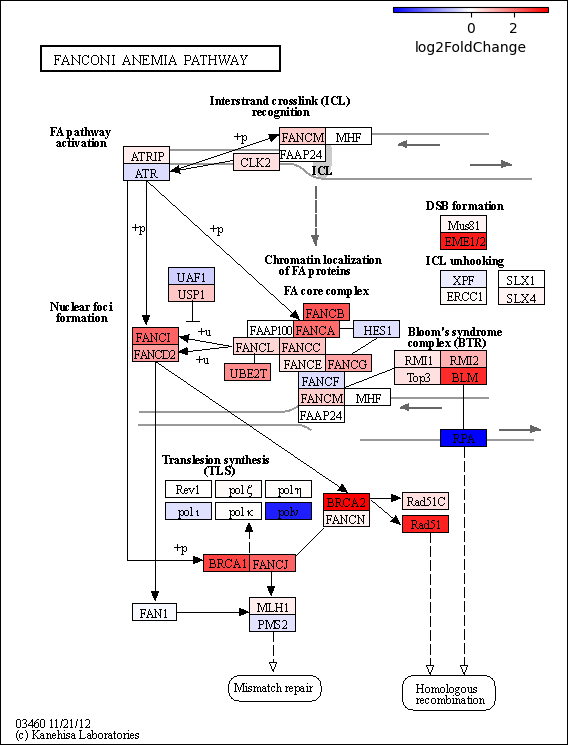

In [61]:
pykegg.deseq2_raw_map(stat_res_summary, pid="hsa03460", legend_width=2)